# Predicting Health Charges

#### Chris Richards
#### Practicum 1, Summer 2020
#### Regis University

### GridSearchCV with XGBoost Regression

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import graphviz

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split

import xgboost as xgb

In [16]:
df = pd.read_csv(r"E:\Regis\Practicum_1\df_2_all_features.csv")
df_profile = df

In [17]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   bmi               1337 non-null   float64
 2   children          1337 non-null   int64  
 3   charges           1337 non-null   float64
 4   sex_female        1337 non-null   int64  
 5   sex_male          1337 non-null   int64  
 6   smoker_no         1337 non-null   int64  
 7   smoker_yes        1337 non-null   int64  
 8   region_northeast  1337 non-null   int64  
 9   region_northwest  1337 non-null   int64  
 10  region_southeast  1337 non-null   int64  
 11  region_southwest  1337 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 125.5 KB
None
               age          bmi     children       charges   sex_female  \
count  1337.000000  1337.000000  1337.000000   1337.000000  1337.000000   
mean     39.222139    30.66

#### Split the input features from the target, "charges"


In [18]:
X = df.loc[:, df.columns != 'charges'] # select all columns except for charges
y = df['charges']

#### GridSearchCV
   
Create XGBoost model object

In [25]:
xg_model = xgb.XGBRegressor() 

Create list of parameters

In [26]:
candidate_parameters = {
    'objective': ['reg:squarederror'],
    'seed': ['1970'],
    'colsample_bytree': [0.1, 0.25, 0.5, 0.75], 
    'learning_rate': [0.1, 0.25, 0.5, 0.75], 
    'max_depth': [3, 5, 8, 10, 15, 20],
    'alpha': [1, 5, 10],
    'gamma': [1, 5, 10],
    'lambda': [1, 5, 10],
    'n_estimators': [5, 10, 20, 50, 100, 1000], 
    #'eval_metric':['rmse'],
    'min_child_weight': [0, 1, 2, 3]
}

Create gridsearch

In [27]:
gs = GridSearchCV(
    estimator=xg_model,
    cv=10,
    param_grid=candidate_parameters,
    scoring='r2',
    n_jobs=-1
)

Fit gridsearch

In [28]:
gs.fit(X, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estim...
             param_grid={'alpha': [1, 5, 10],
                         'colsample_bytree': [0.1, 0.25, 0.5, 0.75],
                         'gamma': [1, 5, 10], 'lambda': [1, 5, 10],
                         'learning_rate': [0.1, 0.25, 0.5, 0.75],
                         'max_depth': [3, 5

Get best parameters

In [29]:
gs_best_params = gs.best_params_
gs_best_params

{'alpha': 1,
 'colsample_bytree': 0.75,
 'gamma': 1,
 'lambda': 10,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 0,
 'n_estimators': 50,
 'objective': 'reg:squarederror',
 'seed': '1970'}

Get best score

In [30]:
score = (gs.best_score_)*100
f"Accuracy (R^2): {score:.2f}%"

'Accuracy (R^2): 86.00%'

Get best estimator

In [31]:
gs_best_estimator = gs.best_estimator_
gs_best_estimator

XGBRegressor(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.75, gamma=1, gpu_id=-1,
             importance_type='gain', interaction_constraints='', lambda=10,
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=0, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=1970, reg_alpha=1,
             reg_lambda=10, scale_pos_weight=1, seed='1970', subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
gs_results = gs.cv_results_

Predict test data

In [37]:
gs_pred = gs.predict(X)
gs_pred

array([18450.129 ,  4200.7866,  6584.702 , ...,  3195.7646,  2938.4475,
       28449.664 ], dtype=float32)

#### XGBoost Best Model
  
Fit the model using best parameters

In [42]:
fit_gs = gs_best_estimator.fit(X,y)
gs_preds = fit_gs.predict(X)

In [41]:
score = fit_gs.score(X, y)*100
f"Accuracy (R^2) Model 2 training: {score:.2f}%"

'Accuracy (R^2) Model 2 training: 87.72%'

In [82]:
#score = fit_gs.score(X_test, gs_preds)*100
#f"Accuracy (R^2) Model 2 testing: {score:.2f}%"

'Accuracy (R^2) Model 2 testing: 100.00%'

In [43]:
mse = mean_squared_error(gs_preds, y)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

MSE: 17989478.45
RMSE: 4241.40


### Save the model to a file

In [44]:
from sklearn.externals import joblib 

C:\Users\cr117\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [46]:
# Save the model as a pickle in a file 
joblib.dump(fit_gs, 'gscv_xgb_model_full_data_set.pkl') 
  
# Load the model from the file 
fit_gs_model_from_joblib = joblib.load('gscv_xgb_model_full_data_set.pkl')  
  
# Use the loaded model to make predictions 
fit_gs_model_from_joblib.predict(X) 

array([18450.129 ,  4200.7866,  6584.702 , ...,  3195.7646,  2938.4475,
       28449.664 ], dtype=float32)

### Save as json file

In [47]:
fit_gs.save_model('gscv_xgb_model_full_data_set.json')

#### XGBoost Best Model: Plots

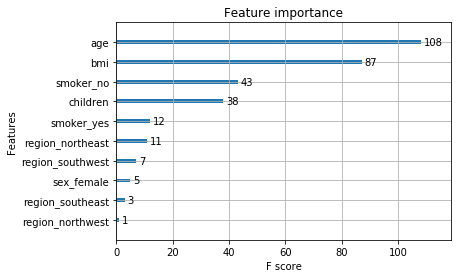

In [48]:
xgb.plot_importance(fit_gs)

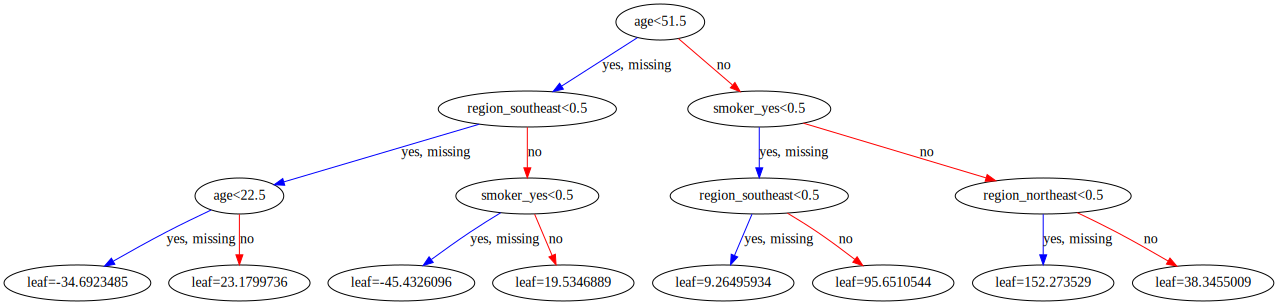

In [49]:
xgb.to_graphviz(fit_gs, num_trees=49)

#### Test out a prediction

In [65]:
# get max charge row
max_charge_row = df.loc[df['age'].idxmax()]
max_charge_row

age                    64.00000
bmi                    24.70000
children                1.00000
charges             30166.61817
sex_female              0.00000
sex_male                1.00000
smoker_no               1.00000
smoker_yes              0.00000
region_northeast        0.00000
region_northwest        1.00000
region_southeast        0.00000
region_southwest        0.00000
Name: 62, dtype: float64

Create new test record similar to max charge record

In [66]:
new_rec_df = pd.DataFrame(max_charge_row)

In [67]:
new_rec_2_df = new_rec_df.transpose()
new_rec_2_df = new_rec_2_df.loc[:, new_rec_2_df.columns != 'charges']

In [68]:
# Change input values, if needed
#new_rec_2_df.at[1316, 'age'] = 18
#new_rec_2_df.at[1316, 'bmi'] = 53

In [69]:
new_rec_2_df

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
62,64.0,24.7,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


Predict on the new record

In [70]:
new_pred = fit_gs.predict(new_rec_2_df)

In [71]:
new_pred

array([15449.6455], dtype=float32)